# Loading the data 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


In [ ]:
ground_truth=pd.read_csv("/content/drive/MyDrive/ISIC-2019/ISIC_2019_Training_GroundTruth.csv")
print(ground_truth.iloc[:,1:].sum()*100/ground_truth.shape[0])

MEL     17.851644
NV      50.827050
BCC     13.118314
AK       3.422684
BKL     10.358849
DF       0.943508
VASC     0.998776
SCC      2.479176
UNK      0.000000
dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ground_truth.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
NEED_IMAGE_SAVE = True
IM_SIZE = 512

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
from skimage import io
from tqdm import tqdm
import seaborn as sns

In [ ]:
!mkdir '512x512-dataset-melanoma'
!mkdir '512x512-test'

In [ ]:
df_train = pd.read_csv('/content/ISIC_2020_Training_GroundTruth.csv')
df_train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
df_train['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

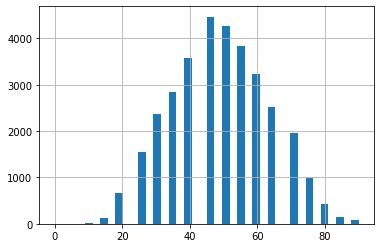

In [ ]:
df_train['age_approx'].hist(bins = 40)

In [ ]:
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('seborrheic keratosis', 'BKL'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('lichenoid keratosis', 'BKL'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('solar lentigo', 'BKL'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('lentigo NOS', 'BKL'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('cafe-au-lait macule', 'UNK'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('atypical melanocytic proliferation', 'UNK'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('unknown', 'UNK'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('nevus', 'NV'))
df_train['diagnosis'] = df_train['diagnosis'].apply(lambda x: x.replace('melanoma', 'MEL'))
df_train['diagnosis'].value_counts()

UNK    27126
NV      5193
MEL      584
BKL      223
Name: diagnosis, dtype: int64

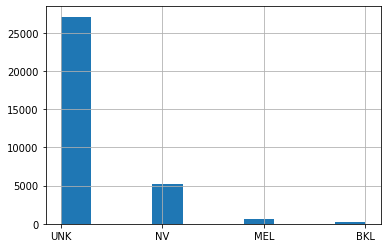

In [ ]:
df_train['diagnosis'].hist()

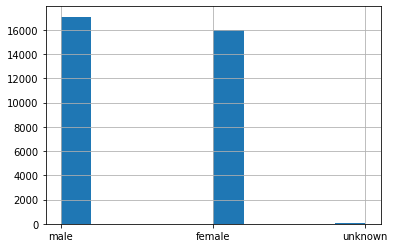

In [ ]:
df_train['sex'].fillna('unknown').hist()

In [ ]:
df_gt = pd.read_csv('/content/drive/MyDrive/ISIC-2019/ISIC_2019_Training_GroundTruth.csv')


In [ ]:
df2 = pd.read_csv('/content/ISIC_2020_Training_GroundTruth_v2.csv')
df2['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

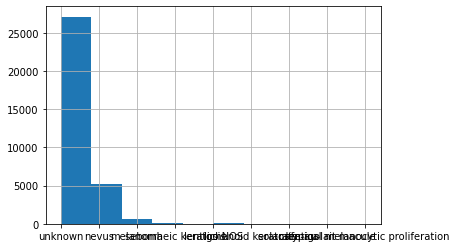

In [ ]:
df2['diagnosis'].hist()

In [ ]:
df2.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0
